In [1]:
%matplotlib inline


# Usage Guide

This tutorial covers some basic usage patterns and best practices to
help you get started with Matplotlib.


In [2]:
import matplotlib.pyplot as plt
import numpy as np

## A simple example

Matplotlib graphs your data on `~.figure.Figure`\s (e.g., windows, Jupyter
widgets, etc.), each of which can contain one or more `~.axes.Axes`, an
area where points can be specified in terms of x-y coordinates, or theta-r
in a polar plot, x-y-z in a 3D plot, etc.  The simplest way of
creating a figure with an axes is using `.pyplot.subplots`. We can then use
`.Axes.plot` to draw some data on the axes:



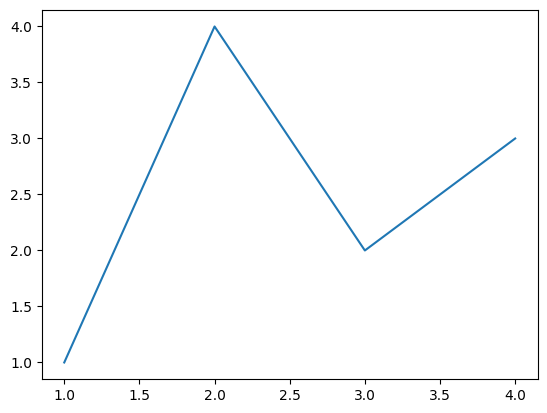

In [3]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Plot some data on the axes.

Many other plotting libraries or languages do not require you to explicitly
create an axes.  For example, in MATLAB, one can just do

.. code-block:: matlab

   plot([1, 2, 3, 4], [1, 4, 2, 3])  % MATLAB plot.

and get the desired graph.

In fact, you can do the same in Matplotlib: for each `~.axes.Axes` graphing
method, there is a corresponding function in the :mod:`matplotlib.pyplot`
module that performs that plot on the "current" axes, creating that axes (and
its parent figure) if they don't exist yet.  So, the previous example can be
written more shortly as



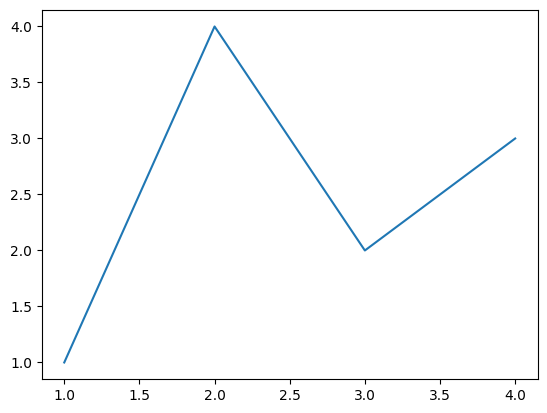

In [4]:
plt.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Matplotlib plot.


## Parts of a Figure

Here is a more detailed layout of the components of a Matplotlib figure.

<img src="file://../../_static/anatomy.png">

### :class:`~matplotlib.figure.Figure`

The **whole** figure.  The figure keeps
track of all the child :class:`~matplotlib.axes.Axes`, a group of
'special' artists (titles, figure legends, etc), and the **canvas**.
(The canvas is not the primary focus. It is crucial as it is the
object that actually does the drawing to get you your plot, but as
the user, it is mostly invisible to you).  A figure can contain any
number of :class:`~matplotlib.axes.Axes`, but will typically have
at least one.

The easiest way to create a new figure is with pyplot::

   fig = plt.figure()  # an empty figure with no Axes
   fig, ax = plt.subplots()  # a figure with a single Axes
   fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes

It's convenient to create the axes together with the figure, but you can
also add axes later on, allowing for more complex axes layouts.

### :class:`~matplotlib.axes.Axes`

This is what you think of as 'a plot'. It is the region of the image
with the data space. A given figure
can contain many Axes, but a given :class:`~matplotlib.axes.Axes`
object can only be in one :class:`~matplotlib.figure.Figure`.  The
Axes contains two (or three in the case of 3D)
:class:`~matplotlib.axis.Axis` objects (be aware of the difference
between **Axes** and **Axis**) which take care of the data limits (the
data limits can also be controlled via the :meth:`.axes.Axes.set_xlim` and
:meth:`.axes.Axes.set_ylim` methods).  Each :class:`~.axes.Axes` has a title
(set via :meth:`~matplotlib.axes.Axes.set_title`), an x-label (set via
:meth:`~matplotlib.axes.Axes.set_xlabel`), and a y-label set via
:meth:`~matplotlib.axes.Axes.set_ylabel`).

The :class:`~.axes.Axes` class and its member functions are the primary entry
point to working with the OO interface.

### :class:`~matplotlib.axis.Axis`

These are the objects most similar to a number line.
They set graph limits and generate ticks (the marks
on the axis) and ticklabels (strings labeling the ticks).  The location of
the ticks is determined by a `~matplotlib.ticker.Locator` object and the
ticklabel strings are formatted by a `~matplotlib.ticker.Formatter`.  The
combination of the correct `.Locator` and `.Formatter` gives very fine
control over the tick locations and labels.

### :class:`~matplotlib.artist.Artist`

Basically, everything visible on the figure is an artist (even
`.Figure`, `Axes <.axes.Axes>`, and `~.axis.Axis` objects).  This includes
`.Text` objects, `.Line2D` objects, :mod:`.collections` objects, `.Patch`
objects, etc... When the figure is rendered, all of the
artists are drawn to the **canvas**.  Most Artists are tied to an Axes; such
an Artist cannot be shared by multiple Axes, or moved from one to another.


## Types of inputs to plotting functions

All of plotting functions expect `numpy.array` or `numpy.ma.masked_array` as
input.  Classes that are similar to arrays ('array-like') such as `pandas`
data objects and `numpy.matrix` may not work as intended.  Common convention
is to convert these to `numpy.array` objects prior to plotting.

For example, to convert a `pandas.DataFrame` ::

  a = pandas.DataFrame(np.random.rand(4, 5), columns = list('abcde'))
  a_asarray = a.values

and to convert a `numpy.matrix` ::

  b = np.matrix([[1, 2], [3, 4]])
  b_asarray = np.asarray(b)


## The object-oriented interface and the pyplot interface

As noted above, there are essentially two ways to use Matplotlib:

- Explicitly create figures and axes, and call methods on them (the
  "object-oriented (OO) style").
- Rely on pyplot to automatically create and manage the figures and axes, and
  use pyplot functions for plotting.

So one can do (OO-style)



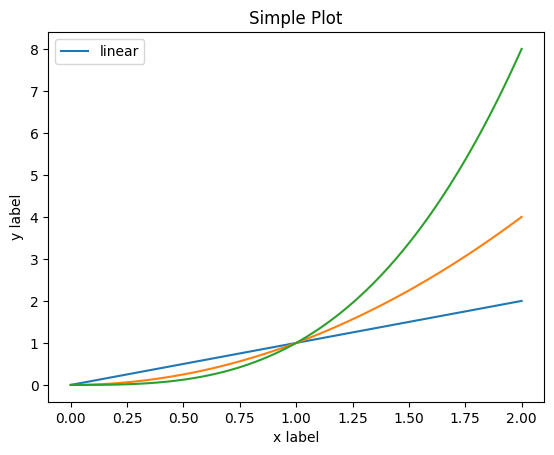

In [11]:
x = np.linspace(0, 2, 100)  # Sample data.

# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(x, x, label='linear')  # Plot some data on the axes.
# ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
# ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend()  # Add a legend.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.

or (pyplot-style)



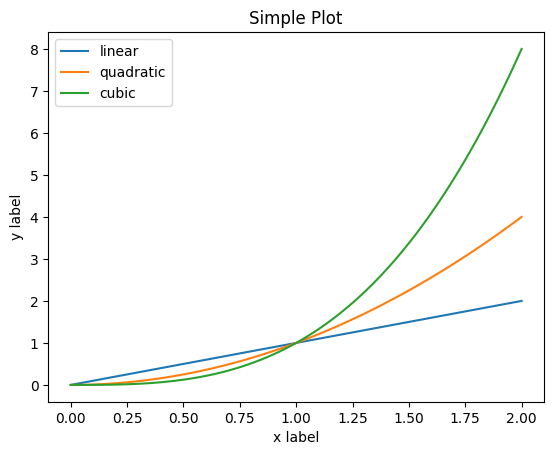

In [6]:
x = np.linspace(0, 2, 100)  # Sample data.

plt.plot(x, x, label='linear')  # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()

In addition, there is a third approach, for the case when embedding
Matplotlib in a GUI application, which completely drops pyplot, even for
figure creation.  We won't discuss it here; see the corresponding section in
the gallery for more info (`user_interfaces`).

Matplotlib's documentation and examples use both the OO and the pyplot
approaches (which are equally powerful), and you should feel free to use
either (however, it is preferable pick one of them and stick to it, instead
of mixing them).  In general, we suggest to restrict pyplot to interactive
plotting (e.g., in a Jupyter notebook), and to prefer the OO-style for
non-interactive plotting (in functions and scripts that are intended to be
reused as part of a larger project).

<div class="alert alert-info"><h4>Note</h4><p>In older examples, you may find examples that instead used the so-called
   ``pylab`` interface, via ``from pylab import *``. This star-import
   imports everything both from pyplot and from :mod:`numpy`, so that one
   could do ::

      x = linspace(0, 2, 100)
      plot(x, x, label='linear')
      ...

   for an even more MATLAB-like style.  This approach is strongly discouraged
   nowadays and deprecated. It is only mentioned here because you may still
   encounter it in the wild.</p></div>

If you need to make the same plots over and over
again with different data sets, use the recommended signature function below.



In [7]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of keyword arguments to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

which you would then use as:



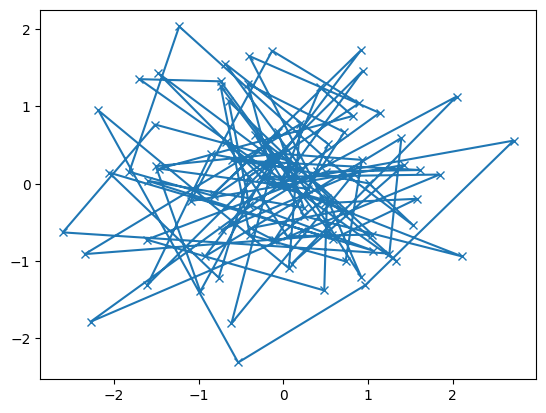

In [8]:
data1, data2, data3, data4 = np.random.randn(4, 100)
fig, ax = plt.subplots(1, 1)
my_plotter(ax, data1, data2, {'marker': 'x'})

or if you wanted to have two sub-plots:



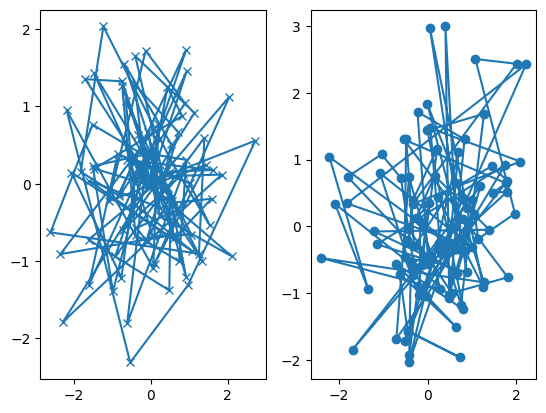

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2)
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'})

These examples provide convenience for more complex graphs.

